In [ ]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import matplotlib.pyplot as plt
importlib.reload(kgs)
#pack_vis.plot_polygons([kgs.center_tree] + kgs.convex_breakdown)

local
local


<module 'kaggle_support' from '/mnt/d/packing/code/analysis/../core/kaggle_support.py'>

In [ ]:
# Get the old runs
fnames = ['ga_multi_tree_11_to_25_cont.pickle', 'ga_multi_tree_26_to_29.pickle', 
          'ga_multi_tree_30_to_30.pickle','ga_multi_tree_31_to_31.pickle', 
          'ga_multi_tree_11_to_25.pickle']
loaded = [kgs.dill_load(os.path.join(kgs.temp_dir , fname)) for fname in fnames]

In [ ]:
import numpy as np
res_per_tree = dict()
for N_trees in np.arange(1,201):
    res_per_tree[N_trees] = []
    for lo in loaded:
        for g in lo.ga.ga_list:
            if g.champions[0].phenotype.N_trees == N_trees:
                res_per_tree[N_trees].append([x[0] for x in g.best_costs_per_generation[-1]])
# take only longest
for N_trees in np.arange(1,201):      
    if len(res_per_tree[N_trees]) > 0:
        max_ind = np.argmax([len(x) for x in res_per_tree[N_trees]])
        res_per_tree[N_trees] = [res_per_tree[N_trees][max_ind]]

In [ ]:
vals_x = []
vals_y = []
for N_trees in np.arange(1,201):    
    try:        
        fname = kgs.temp_dir + f'/controller_runs/done/ga_N{N_trees}_seed84_done.pickle'
        rr = kgs.dill_load(fname)
        res_per_tree[N_trees].append([x[0] for x in rr.ga.best_costs_per_generation[-1]])
        print(N_trees)
        vals_x.append(N_trees)
        vals_y.append(len(rr.ga.best_costs_per_generation[-1]))
    except: 
        try:
            fname = kgs.temp_dir + f'/controller_runs/ga_N{N_trees}_seed84.pickle'
            rr = kgs.dill_load(fname)
            res_per_tree[N_trees].append([x[0] for x in rr.ga.best_costs_per_generation[-1]])
            print(N_trees, ' ongoing')
        except: pass


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
156  ongoing


Text(0, 0.5, 'Number of generations')

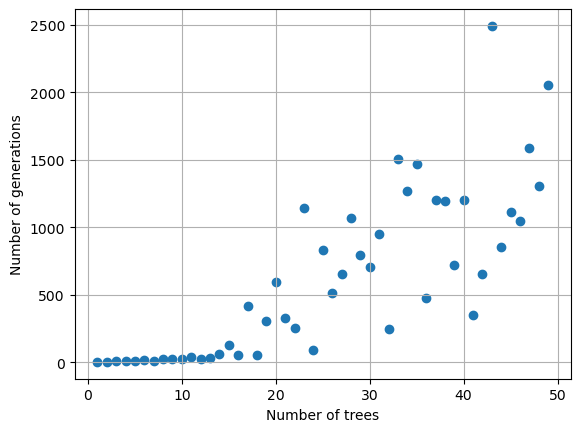

In [ ]:
plt.scatter(np.array(vals_x),np.array(vals_y)-1000)
plt.grid(True)
plt.xlabel('Number of trees')
plt.ylabel('Number of generations')

/tmp/ipykernel_154693/1866861649.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


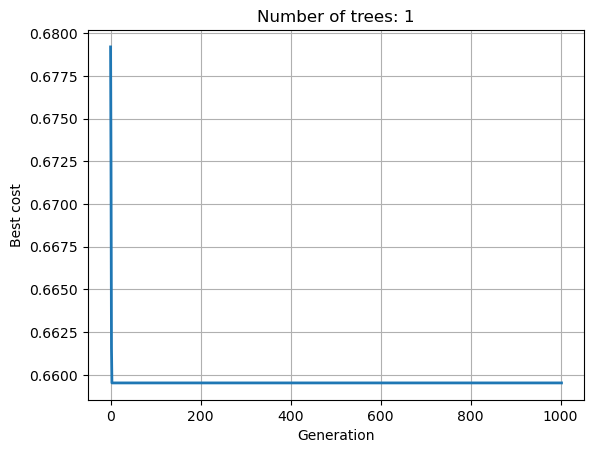

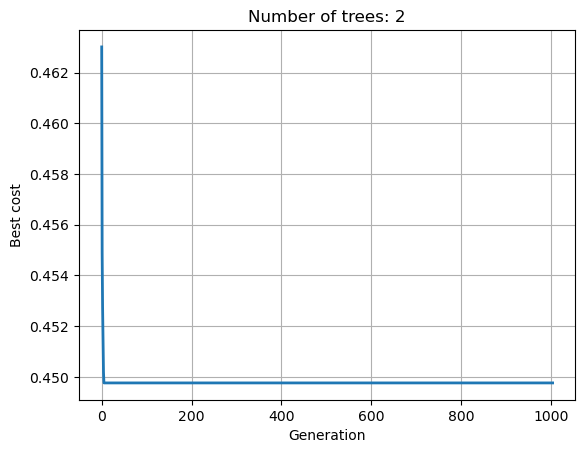

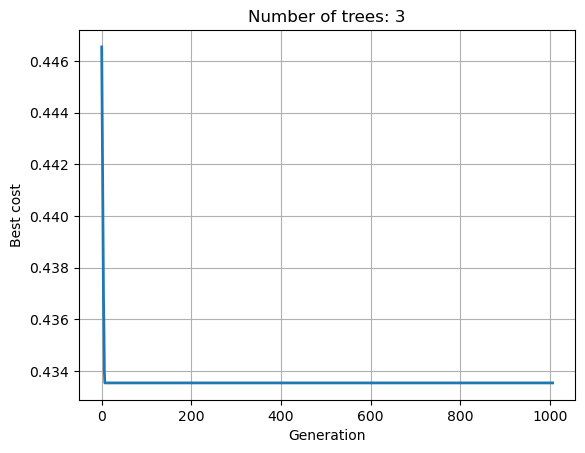

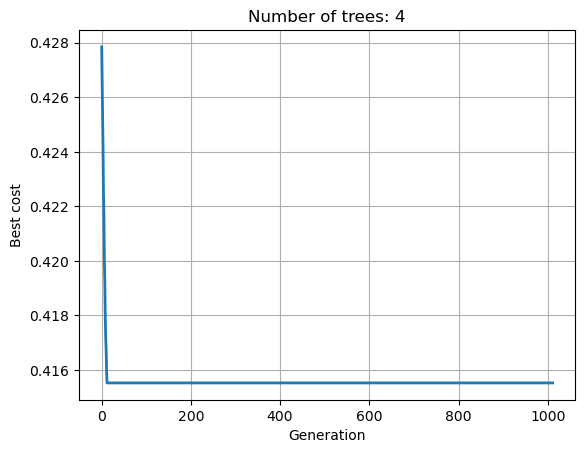

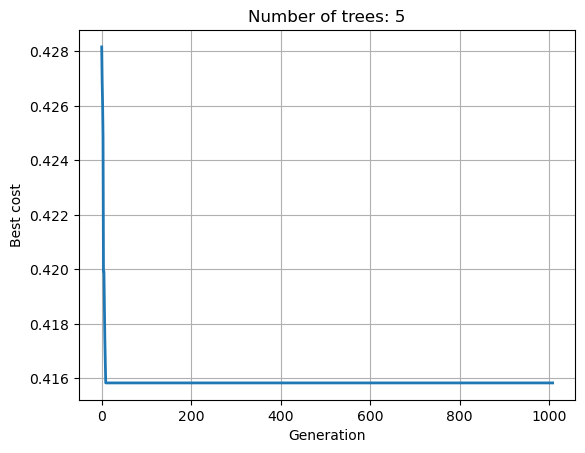

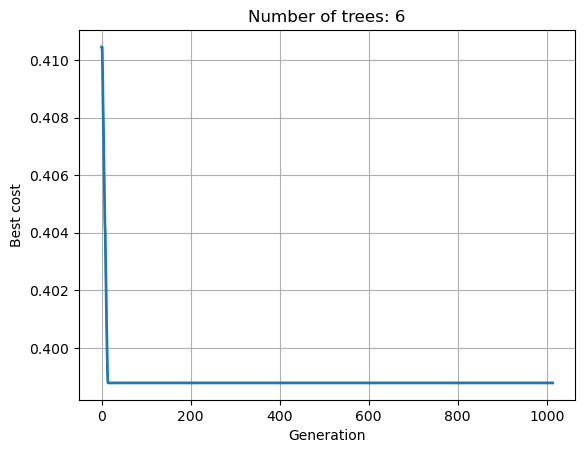

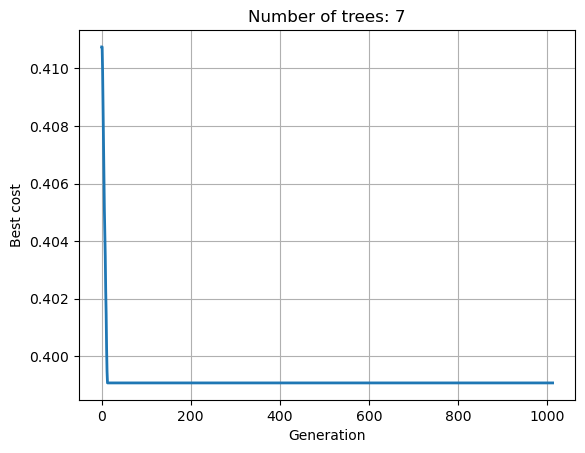

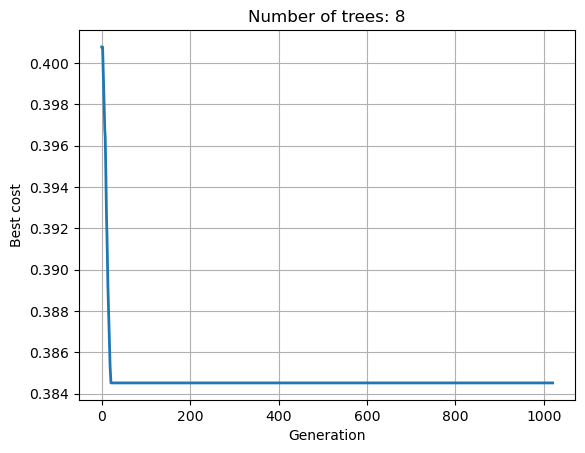

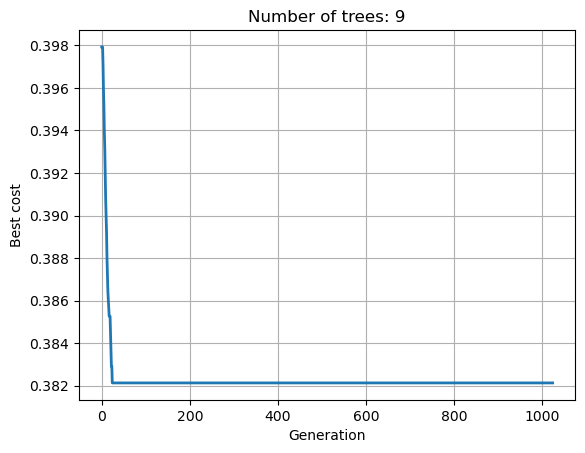

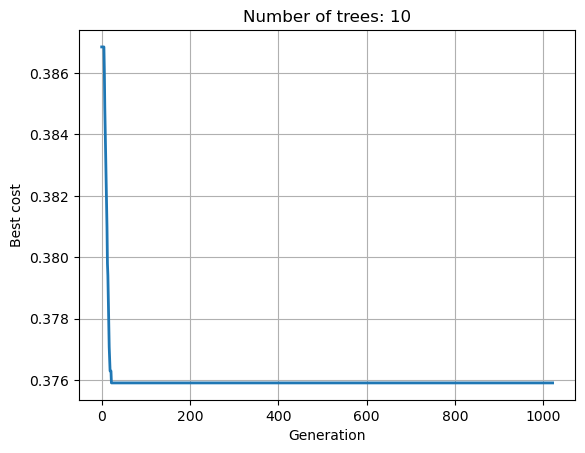

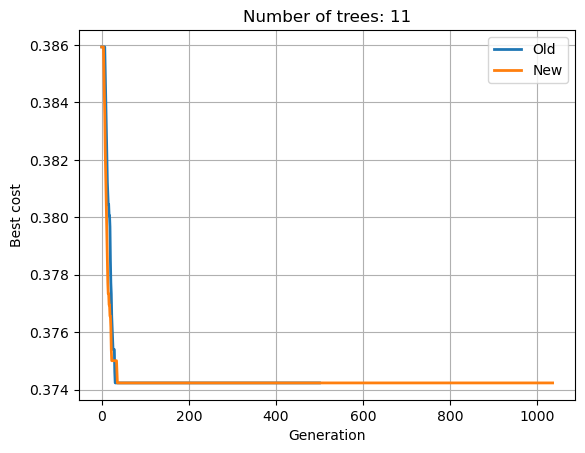

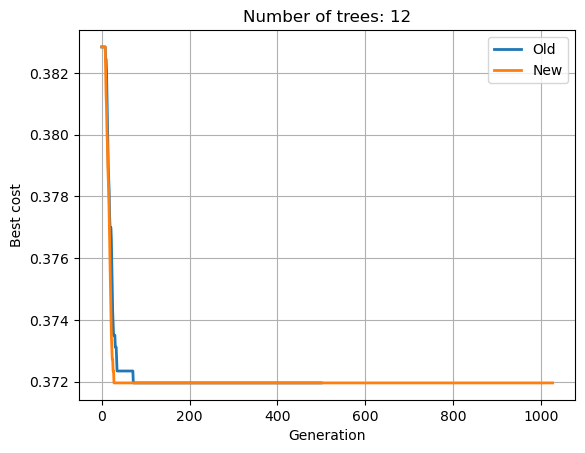

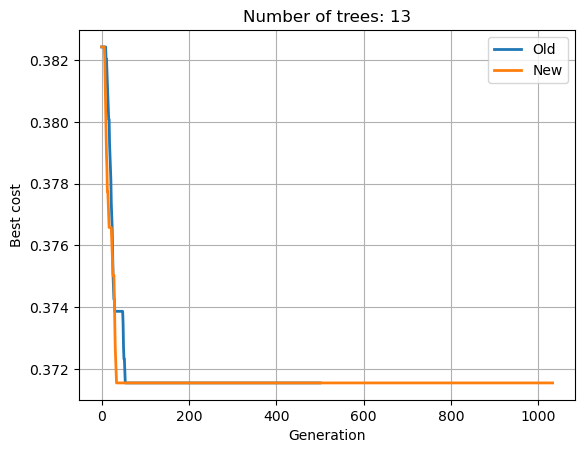

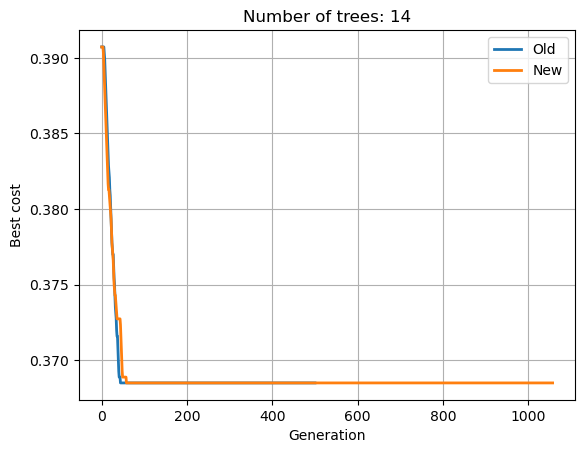

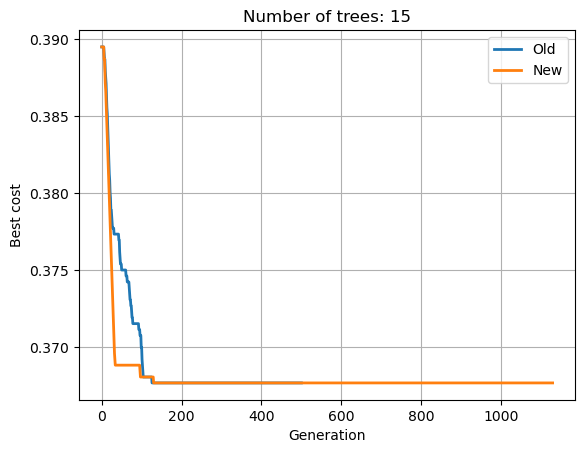

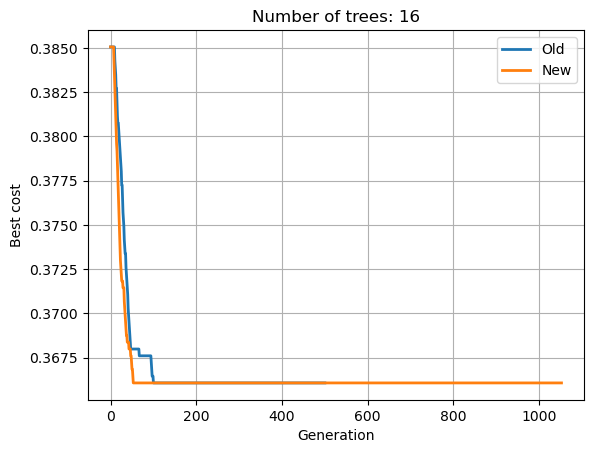

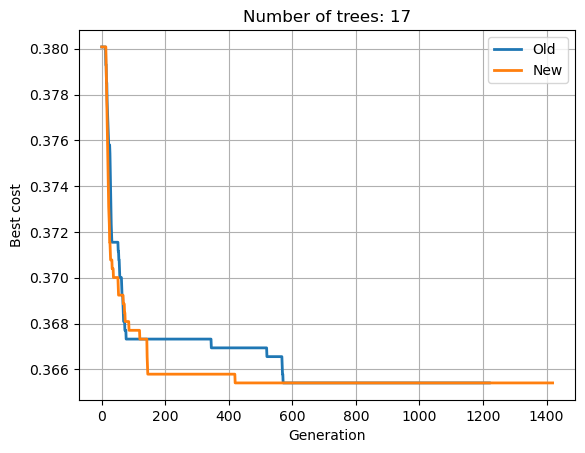

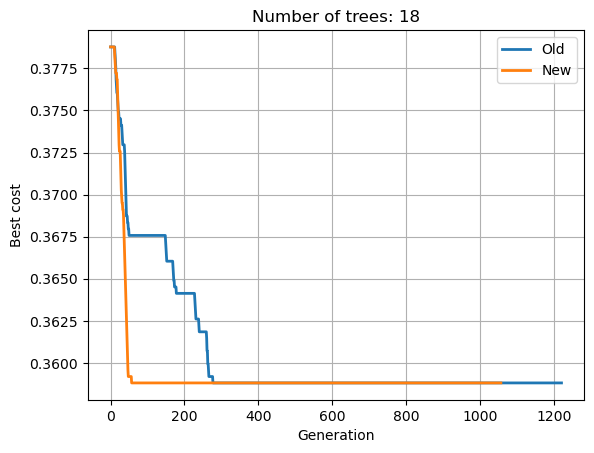

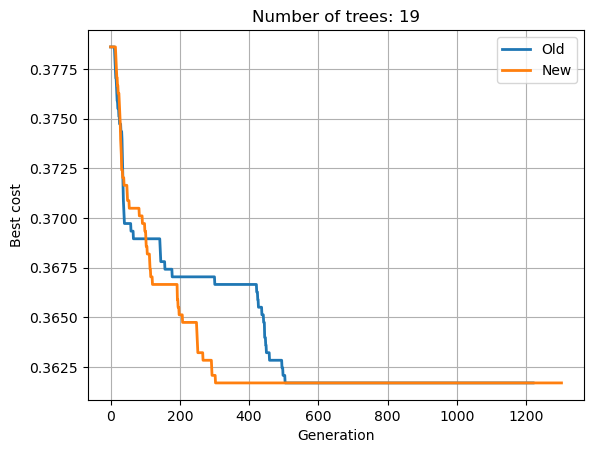

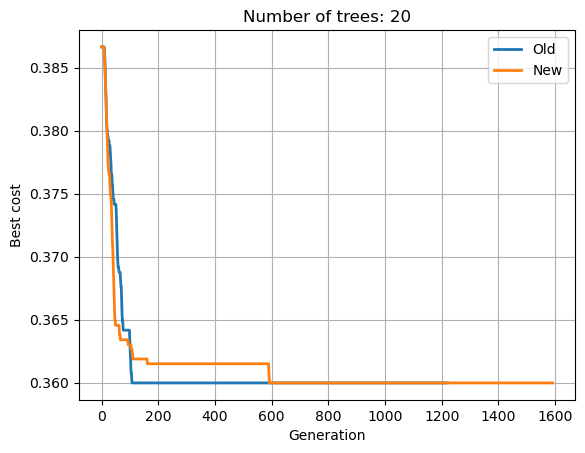

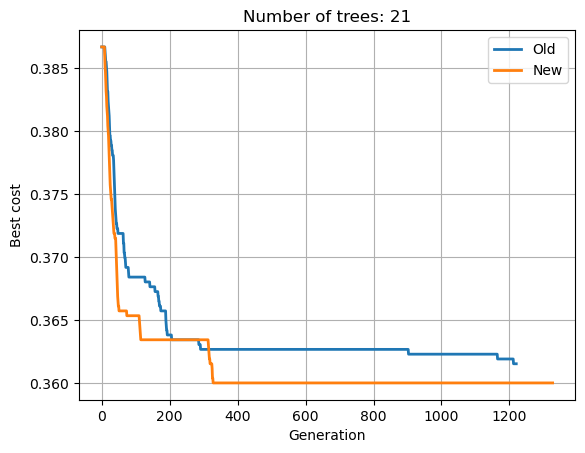

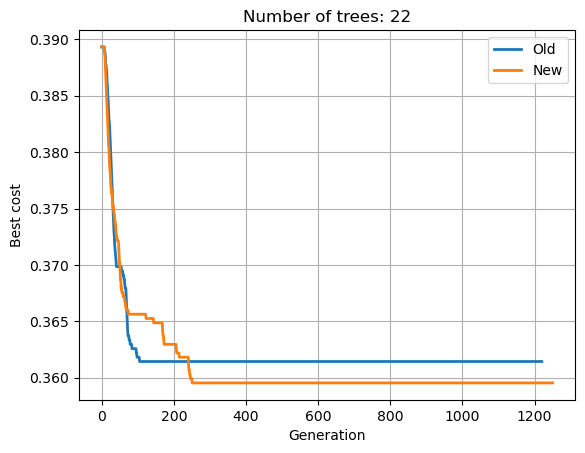

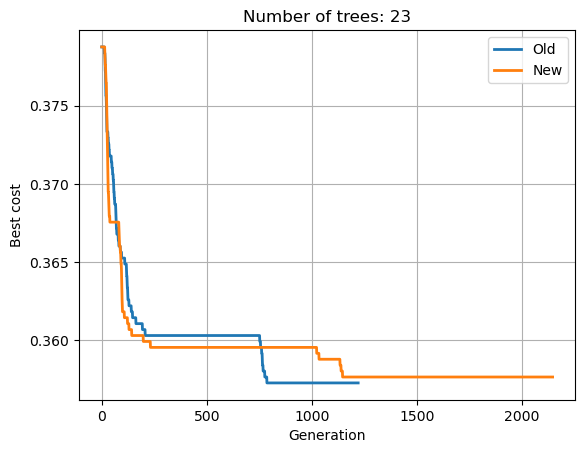

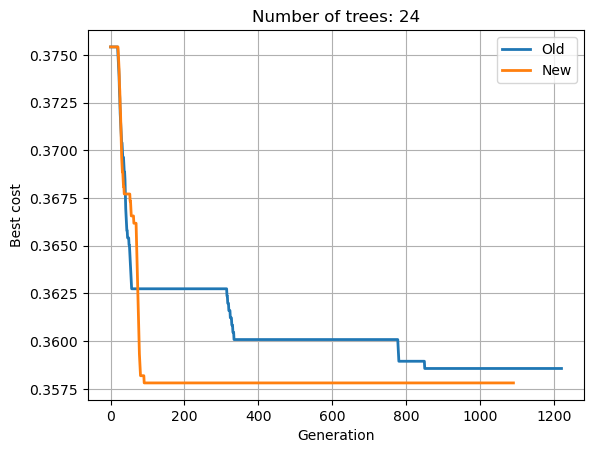

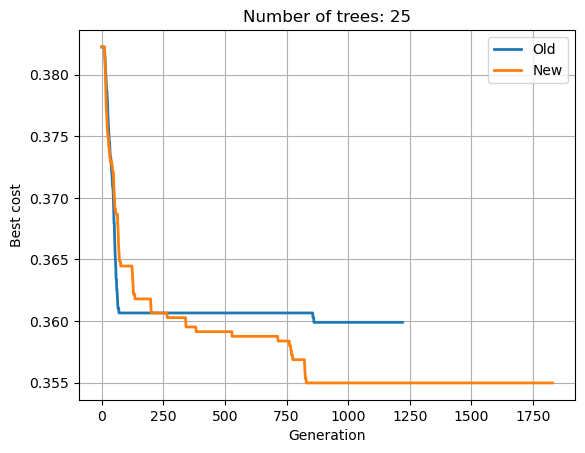

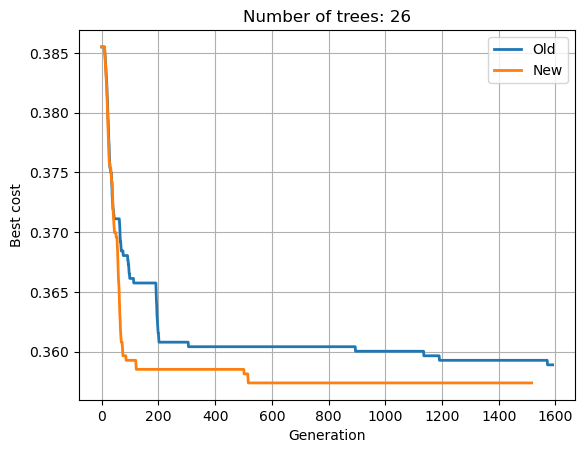

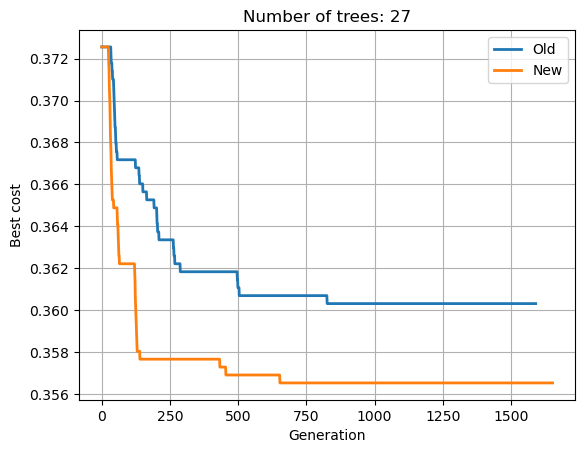

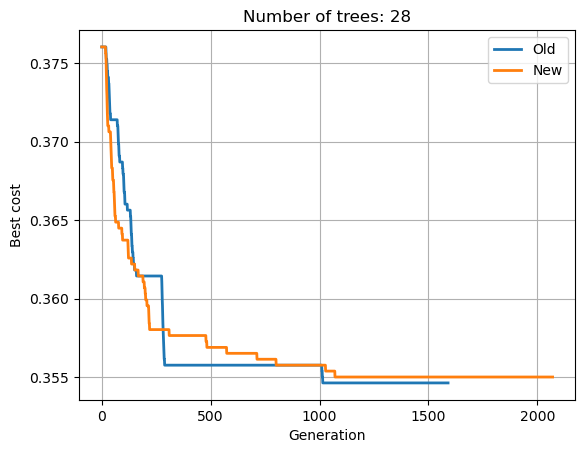

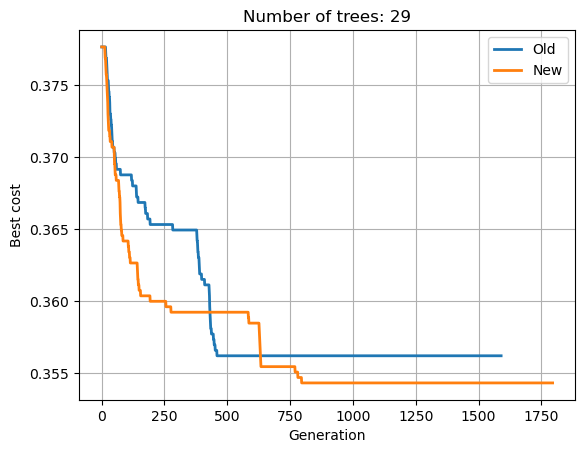

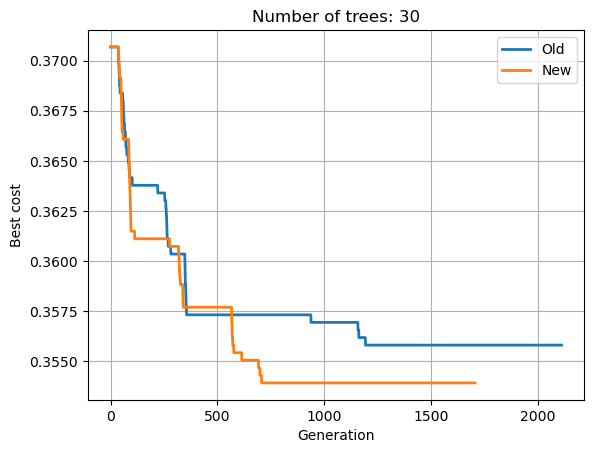

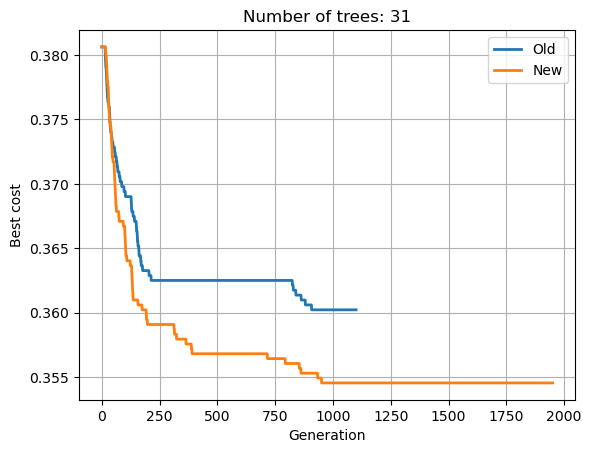

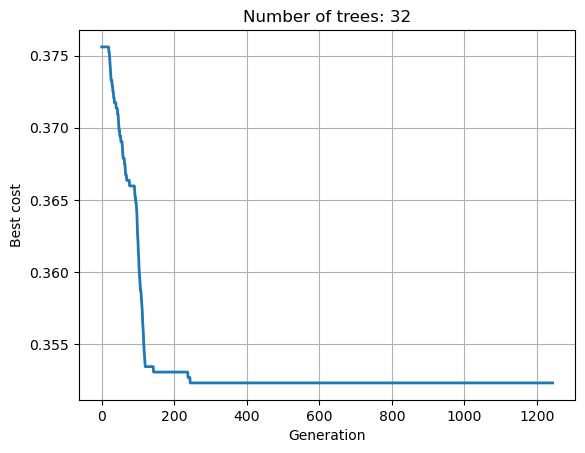

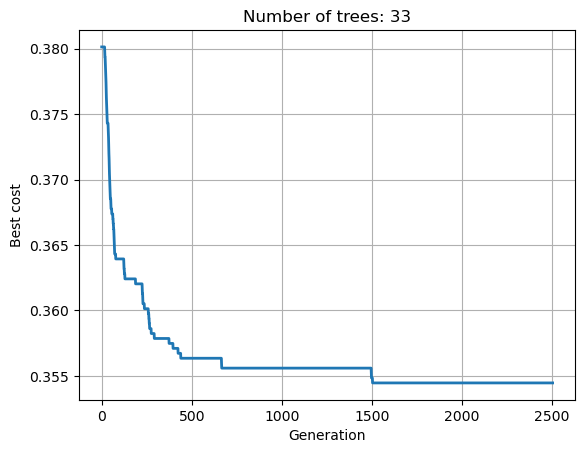

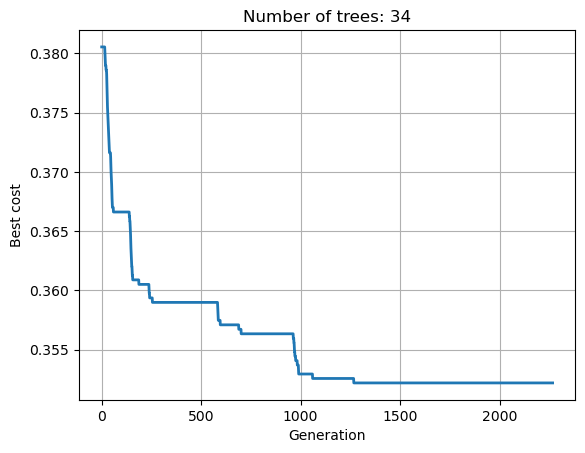

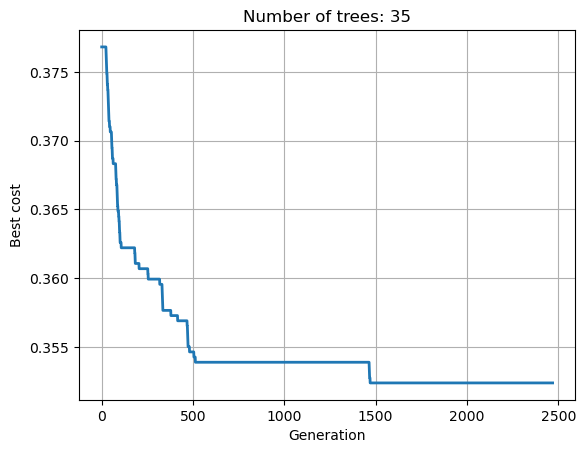

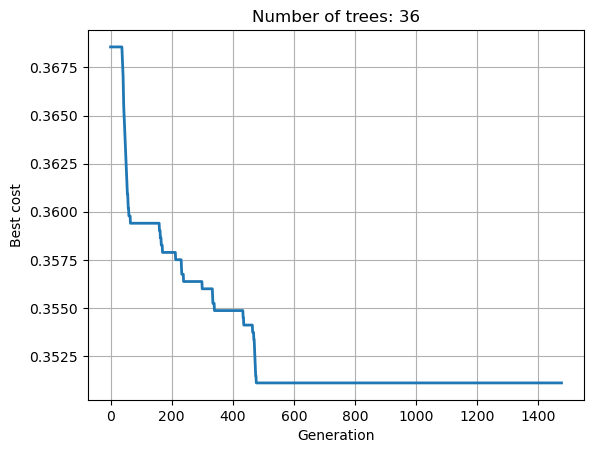

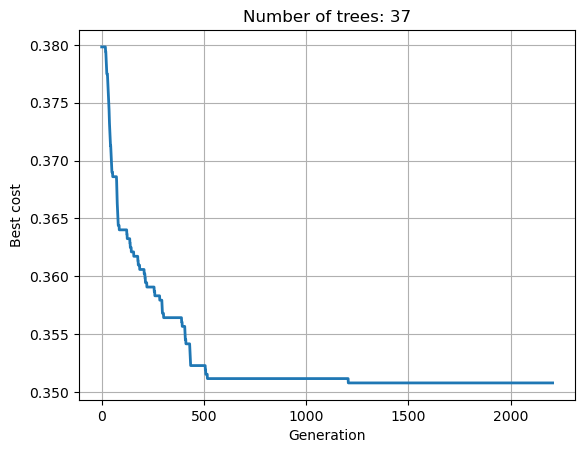

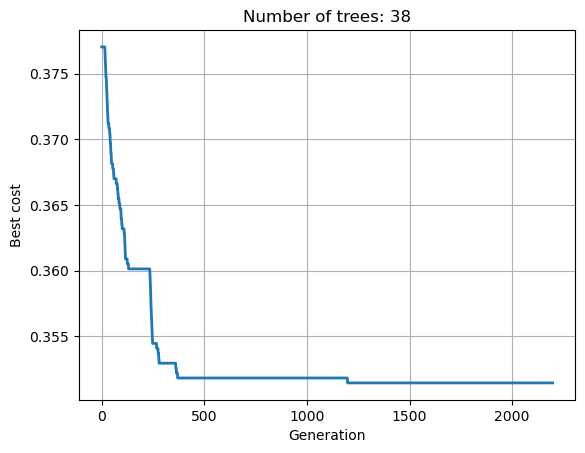

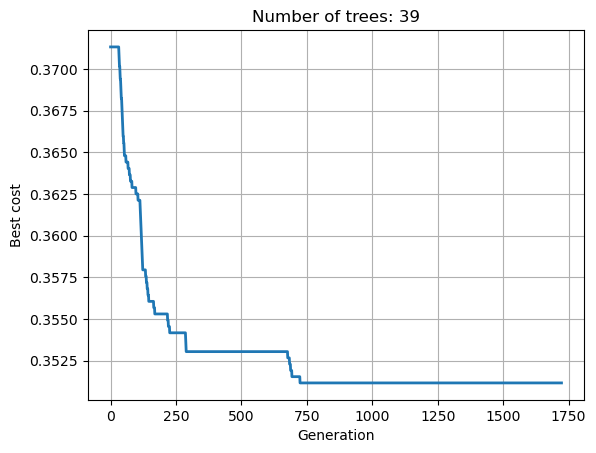

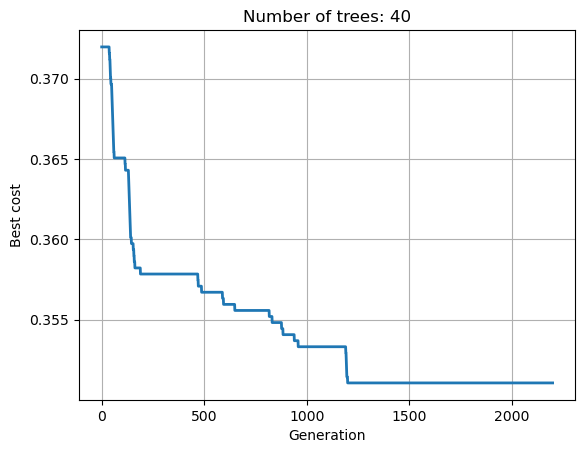

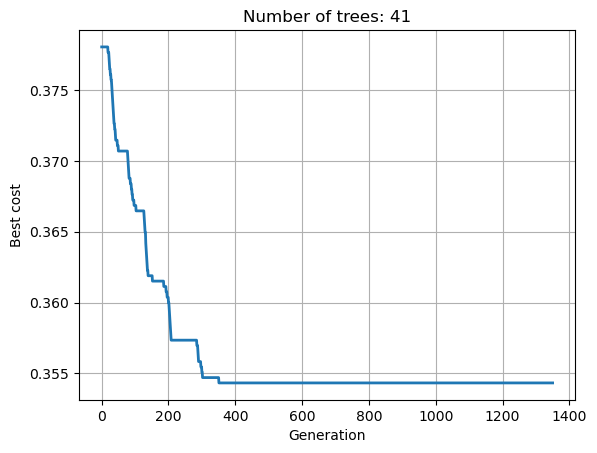

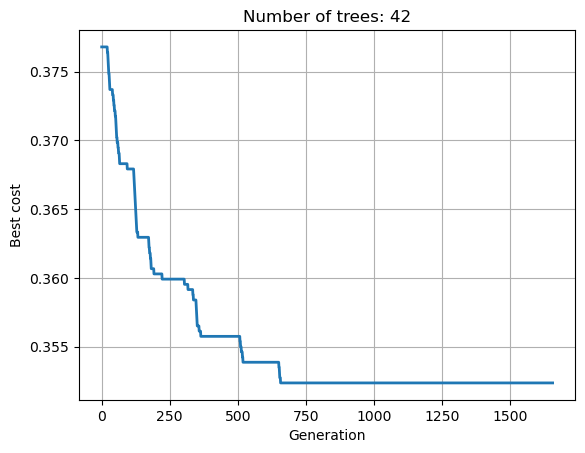

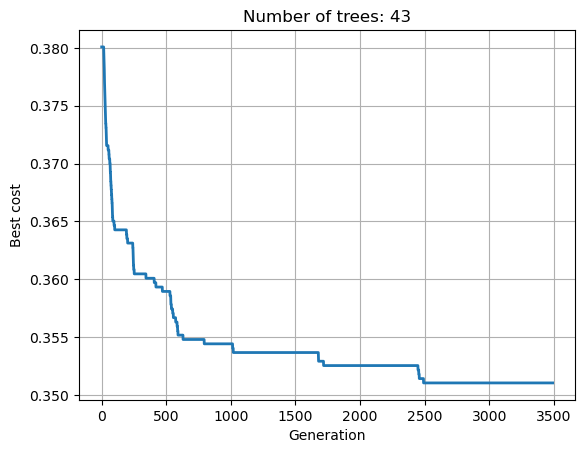

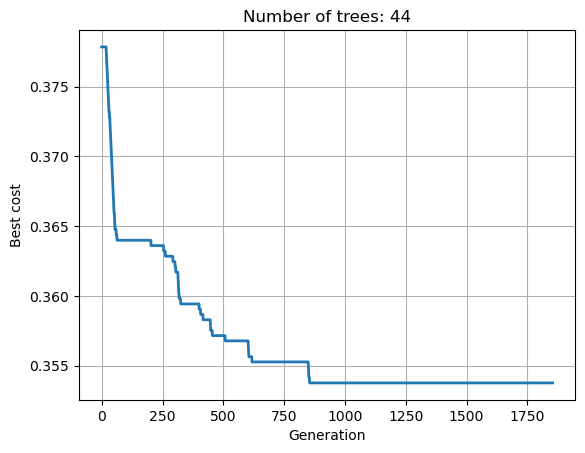

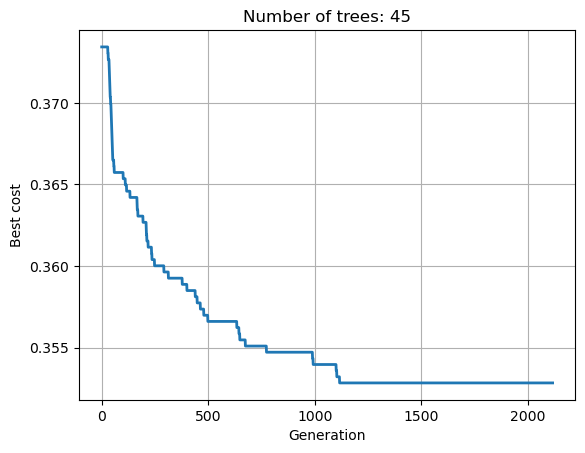

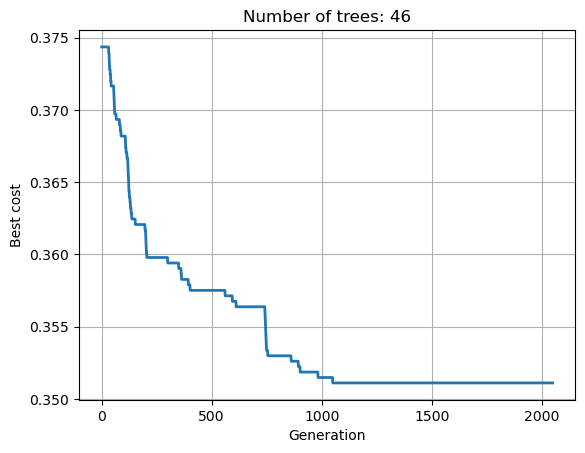

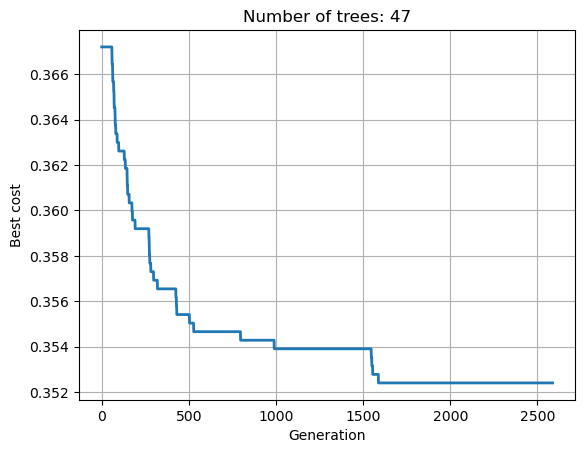

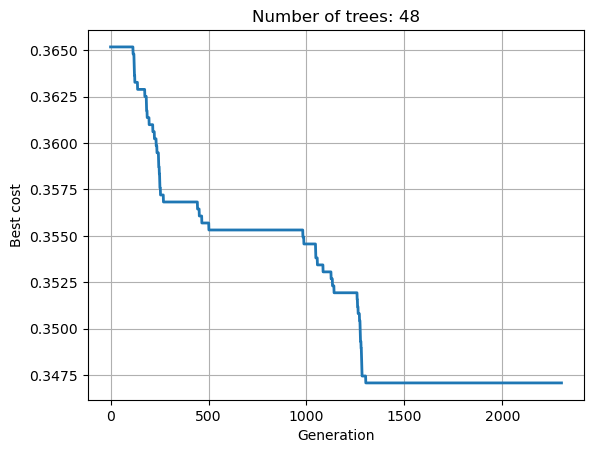

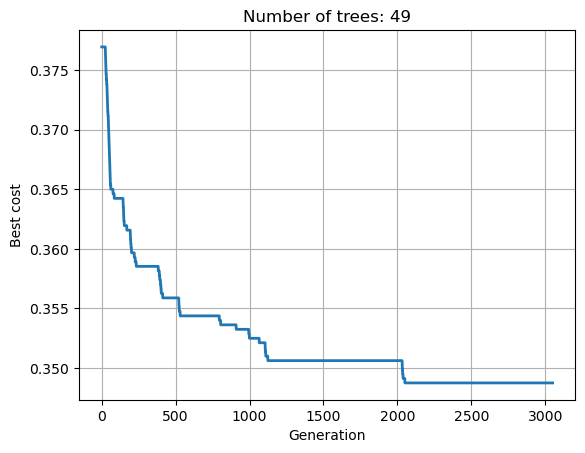

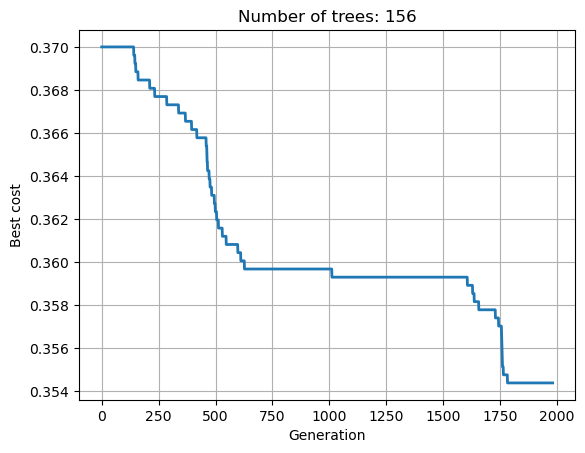

In [ ]:
for N_trees in np.arange(1,201):
    if len(res_per_tree[N_trees])>0:
        plt.figure()
        for res in res_per_tree[N_trees]:
            plt.plot(res, linewidth=2)
        plt.title(f'Number of trees: {N_trees}')
        plt.xlabel('Generation')
        plt.ylabel('Best cost')
        plt.grid()
    if len(res_per_tree[N_trees])>1:
        plt.legend(('Old', 'New'))
